# Problem Set Two - Data Science Math

## Question 1 - Load an RGB image from a URL

Importing the necesarry libraries

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve
import cv2

Specifying the URL of the image I am loading

In [2]:
cat_picture = "https://i.etsystatic.com/35132655/r/il/d4693b/4448959122/il_fullxfull.4448959122_7wb7.jpg"

Using 'requests' to fetch the image data

In [3]:
response = requests.get(cat_picture)

Checking if the request was successful (status code 200), and displaying the image using matplotlib

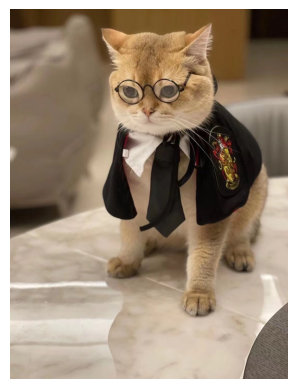

In [4]:
if response.status_code == 200:
  img = Image.open(BytesIO(response.content))
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels
  plt.show()

## Question two - Resize the image to 224x224

Resizing the image to 224x224 pixels

In [5]:
img = img.resize((224, 224))

Displaying the resized image

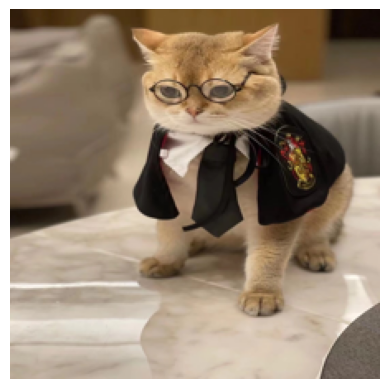

In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()

## Question Three - Show a greyscale copy

Displaying the greyscale copy of the original image using the 'gray' colormap for greyscale and removing the axis labels

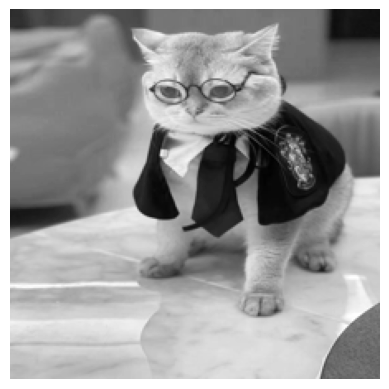

In [7]:
np_image = np.array(img)
np_image.shape[0]
greyImage = np_image[:, :, 0]

plt.imshow(greyImage, cmap='gray')
plt.axis('off')
plt.show()

## Question Four - Convolve with 10 random filters and show filters and feature maps for each

Generating 10 random 3x3 filters

In [8]:
num_filters = 10
filter_size = (3, 3, 3)
filters = [np.random.rand(*filter_size) for _ in range(num_filters)]

Creating subplots to display filters and feature maps

In [9]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Define a function to generate random 3D filters

In [10]:
def generate_random_3d_filters(num_filters, filter_size, depth):
    filters = np.random.randn(num_filters, filter_size, filter_size, depth)
    return filters

Define a function to apply 3D filters to the color image and return the feature maps

In [11]:
def apply_3d_filters(image, filters):
    feature_maps = []
    for filter in filters:
        convolved = np.zeros_like(image, dtype=np.float64)
        for channel in range(depth):
            convolved[:, :, channel] = convolve(image[:, :, channel], filter[:, :, channel], mode='same')
        feature_maps.append(convolved.astype(np.uint8))
    return feature_maps

Generate 10 random 3D filters and apply them to the color image

In [12]:
num_filters = 10
filter_size = 3
depth = 3
filters = generate_random_3d_filters(num_filters, filter_size, depth)
feature_maps = apply_3d_filters(np_image, filters)

Display the filters and feature maps

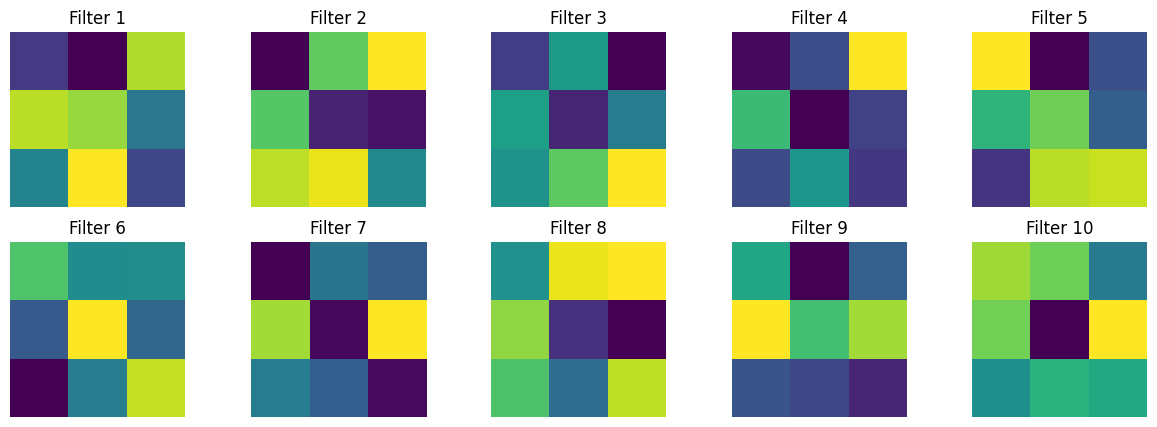

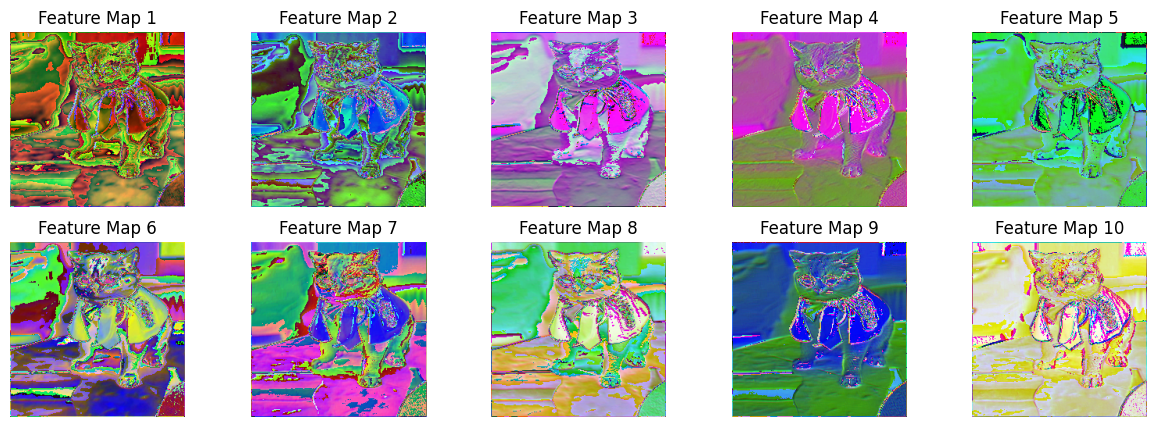

In [13]:
plt.figure(figsize=(15, 5))
for i in range(num_filters):
    plt.subplot(2, num_filters // 2, i + 1)
    plt.imshow(filters[i][:, :, 0])
    plt.title(f'Filter {i + 1}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(15, 5))
for i in range(num_filters):
    plt.subplot(2, num_filters // 2, i + 1)
    plt.imshow(feature_maps[i])
    plt.title(f'Feature Map {i + 1}')
    plt.axis('off')
plt.show()

# Extra Credit Part One

## Experiment with at least 4 different ways of turning the image from color to grayscale.

Method One: Using The luminosity method computes the grayscale value based on the perceived brightness of each channel (R, G, B) as perceived by the human eye. This method takes into account the differences in how our eyes perceive different colors.

In [14]:
greyscale1 = np.empty((np_image.shape[0], np_image.shape[1]))
for x in range(np_image.shape[0]):
  for y in range(np_image.shape[1]):
    lum_val = (0.21 * float(np_image[x,y,0])) + (0.72 * float(np_image[x,y,1])) + (0.07 * float(np_image[x,y,2]))
    greyscale1[x,y] = lum_val

Method Two: The average method takes the average of the red blue and green channels for the greyscale value of each pixel

In [15]:
greyscale2 = np.empty((np_image.shape[0], np_image.shape[1]))
for x in range(np_image.shape[0]):
  for y in range(np_image.shape[1]):
    lum_val = (int(np_image[x,y,0]) + int(np_image[x,y,1]) + int(np_image[x,y,2])) / 3
    greyscale2[x,y] = lum_val

Method Three: The desaturation method calculates the grayscale value by taking the maximum and minimum of the three colors for each pixel and averaging the max and min.

In [16]:
greyscale3 = np.empty((np_image.shape[0], np_image.shape[1]))
for x in range(np_image.shape[0]):
  for y in range(np_image.shape[1]):
    lum_val = (max(int(np_image[x,y,0]), int(np_image[x,y,1]), int(np_image[x,y,2])) + min(int(np_image[x,y,0]), int(np_image[x,y,1]), int(np_image[x,y,2]))) / 2
    greyscale3[x,y] = lum_val

Method Four: Single channel greyscale: only using the values from the Red channel to create a greyscale image

In [17]:
greyscale4 = np_image[:,:,0]

Showing the four greyscale images together

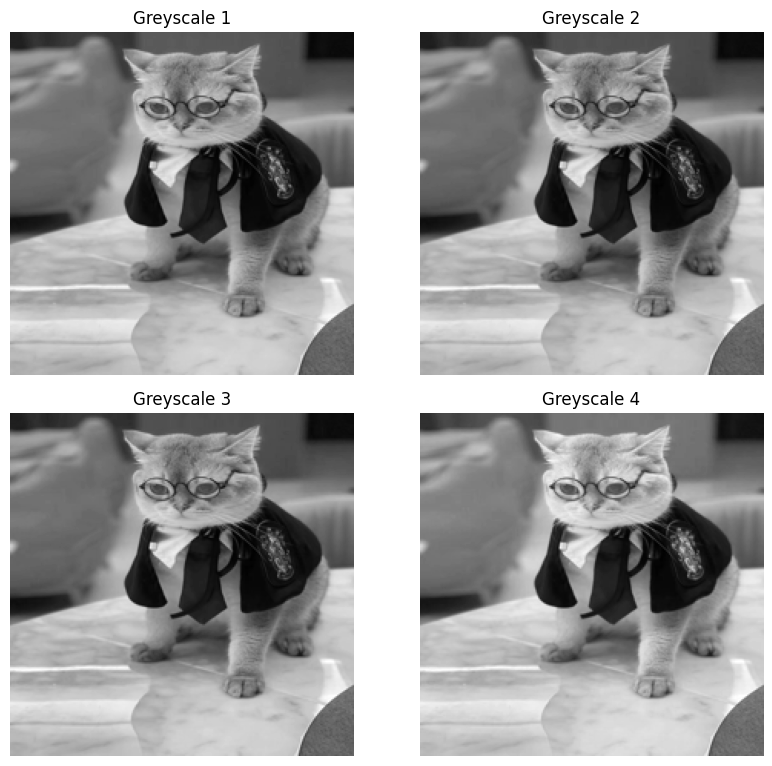

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(greyscale1, cmap='gray')
plt.title('Greyscale 1')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(greyscale2, cmap='gray')
plt.title('Greyscale 2')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(greyscale3, cmap='gray')
plt.title('Greyscale 3')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(greyscale4, cmap='gray')
plt.title('Greyscale 4')

plt.tight_layout()
plt.axis('off')
plt.show()